In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 1. Understand the dataset:

In [4]:
housing=pd.read_csv("PEP1.csv")

In [5]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# a. Identify the shape of the dataset

In [8]:
housing.shape

(1460, 81)

# b. Identify variables with null values

In [9]:
housing.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# c. Identify variables with unique values

In [10]:
housing.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [11]:
for i in housing.columns:
    print("Number of uniquevalues:" ,i,":", housing[i].nunique())
    print(i, ":" , housing[i].unique())
    print("#"*50)

Number of uniquevalues: Id : 1460
Id : [   1    2    3 ... 1458 1459 1460]
##################################################
Number of uniquevalues: MSSubClass : 15
MSSubClass : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
##################################################
Number of uniquevalues: MSZoning : 5
MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
##################################################
Number of uniquevalues: LotFrontage : 110
LotFrontage : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313

# 2. Generate a separate dataset for numerical and categorical variables

In [12]:
num_housing=housing.select_dtypes(include=[np.number])
categorical_housing=housing.select_dtypes(include=object)

In [13]:
num_housing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [14]:
categorical_housing.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# 3. EDA of numerical variables:

b. Identify the skewness and distribution
c. Identify significant variables using a correlation matrix
d. Pair plot for distribution and density

# a. Missing value treatment


In [15]:
num_housing.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
Bedroom            0
Kitchen            0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [16]:
num_housing=num_housing.dropna()

In [17]:
num_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1121 non-null   int64  
 1   MSSubClass     1121 non-null   int64  
 2   LotFrontage    1121 non-null   float64
 3   LotArea        1121 non-null   int64  
 4   OverallQual    1121 non-null   int64  
 5   OverallCond    1121 non-null   int64  
 6   YearBuilt      1121 non-null   int64  
 7   YearRemodAdd   1121 non-null   int64  
 8   MasVnrArea     1121 non-null   float64
 9   BsmtFinSF1     1121 non-null   int64  
 10  BsmtFinSF2     1121 non-null   int64  
 11  BsmtUnfSF      1121 non-null   int64  
 12  TotalBsmtSF    1121 non-null   int64  
 13  1stFlrSF       1121 non-null   int64  
 14  2ndFlrSF       1121 non-null   int64  
 15  LowQualFinSF   1121 non-null   int64  
 16  GrLivArea      1121 non-null   int64  
 17  BsmtFullBath   1121 non-null   int64  
 18  BsmtHalf

In [18]:
num_housing.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
Bedroom          0
Kitchen          0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

# b. Identify the skewness and distribution

In [19]:
num_housing.skew(axis=0, skipna=True)

Id                0.018663
MSSubClass        1.412907
LotFrontage       2.251197
LotArea          15.608113
OverallQual       0.287800
OverallCond       0.846451
YearBuilt        -0.618350
YearRemodAdd     -0.565757
MasVnrArea        2.706945
BsmtFinSF1        1.934077
BsmtFinSF2        4.399358
BsmtUnfSF         0.875774
TotalBsmtSF       1.754916
1stFlrSF          1.363783
2ndFlrSF          0.807411
LowQualFinSF     10.020823
GrLivArea         1.549961
BsmtFullBath      0.568804
BsmtHalfBath      4.107874
FullBath          0.015822
HalfBath          0.638178
Bedroom           0.074427
Kitchen           4.822542
TotRmsAbvGrd      0.723117
Fireplaces        0.643698
GarageYrBlt      -0.641738
GarageCars        0.206017
GarageArea        0.733894
WoodDeckSF        1.549793
OpenPorchSF       2.403928
EnclosedPorch     3.173250
3SsnPorch        10.854868
ScreenPorch       4.019111
PoolArea         13.783823
MiscVal           9.699989
MoSold            0.173039
YrSold            0.106730
S

# c. Identify significant variables using a correlation matrix

In [20]:
num_housing.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.021937,-0.013289,-0.040711,-0.058269,0.004387,-0.020862,-0.027664,-0.073472,-0.013751,...,-0.025060,-0.001972,0.009935,-0.066833,0.015183,0.048010,0.045799,-0.000570,0.013407,-0.047122
MSSubClass,0.021937,1.000000,-0.386940,-0.198096,0.029522,-0.087859,0.025800,0.006645,0.040240,-0.070389,...,-0.017988,0.004054,-0.017790,-0.039739,-0.021789,0.003166,-0.040689,-0.027170,-0.012448,-0.088032
LotFrontage,-0.013289,-0.386940,1.000000,0.421184,0.241322,-0.046312,0.109726,0.086414,0.189969,0.241352,...,0.082166,0.161815,0.014261,0.069716,0.035906,0.211746,0.001471,0.018815,0.013267,0.344270
LotArea,-0.040711,-0.198096,0.421184,1.000000,0.167525,-0.034348,0.029205,0.026848,0.106115,0.230441,...,0.133576,0.099170,-0.023631,0.012520,0.072517,0.109147,0.012790,0.008998,-0.006904,0.299962
OverallQual,-0.058269,0.029522,0.241322,0.167525,1.000000,-0.163157,0.589385,0.570757,0.423988,0.249500,...,0.282512,0.340679,-0.144344,0.017331,0.055296,0.080131,-0.062064,0.079895,-0.008903,0.797881
OverallCond,0.004387,-0.087859,-0.046312,-0.034348,-0.163157,1.000000,-0.426462,0.039402,-0.166762,-0.054788,...,-0.010835,-0.076273,0.062748,-0.006861,0.087030,-0.023566,0.119772,-0.014236,0.041003,-0.124391
YearBuilt,-0.020862,0.025800,0.109726,0.029205,0.589385,-0.426462,1.000000,0.623171,0.332190,0.236941,...,0.238548,0.235432,-0.392693,0.027948,-0.063694,0.006717,-0.096973,0.013784,-0.004585,0.525394
YearRemodAdd,-0.027664,0.006645,0.086414,0.026848,0.570757,0.039402,0.623171,1.000000,0.193376,0.120774,...,0.244602,0.260521,-0.214115,0.026304,-0.034288,0.019307,-0.040420,0.026884,0.041302,0.521253
MasVnrArea,-0.073472,0.040240,0.189969,0.106115,0.423988,-0.166762,0.332190,0.193376,1.000000,0.285331,...,0.174649,0.129532,-0.116832,0.022331,0.052646,0.021648,-0.054044,0.015850,-0.017569,0.488658
BsmtFinSF1,-0.013751,-0.070389,0.241352,0.230441,0.249500,-0.054788,0.236941,0.120774,0.285331,1.000000,...,0.206246,0.127900,-0.105410,0.021831,0.059635,0.194349,0.003027,-0.015281,0.010224,0.390301


# d. Pair plot for distribution and density

# 4. EDA of categorical variables

# a. Missing value treatment

In [21]:
categorical_housing.isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [22]:
categorical_columns=categorical_housing.columns

In [23]:
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# b. Count plot and box plot for bivariate analysis

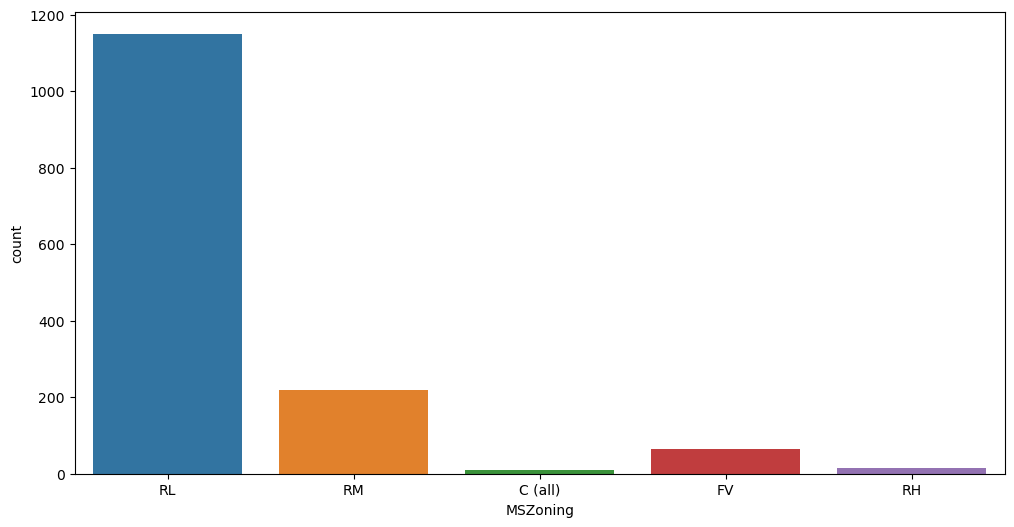

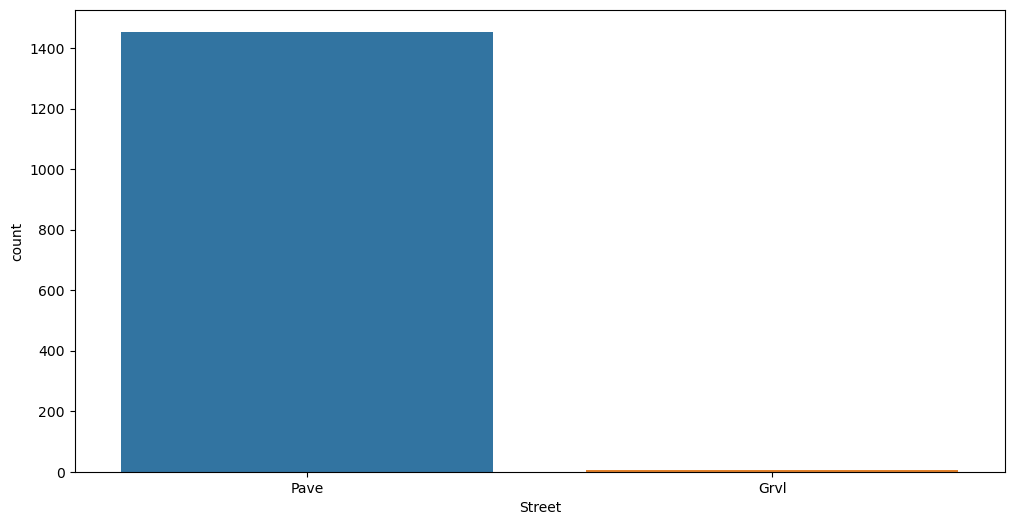

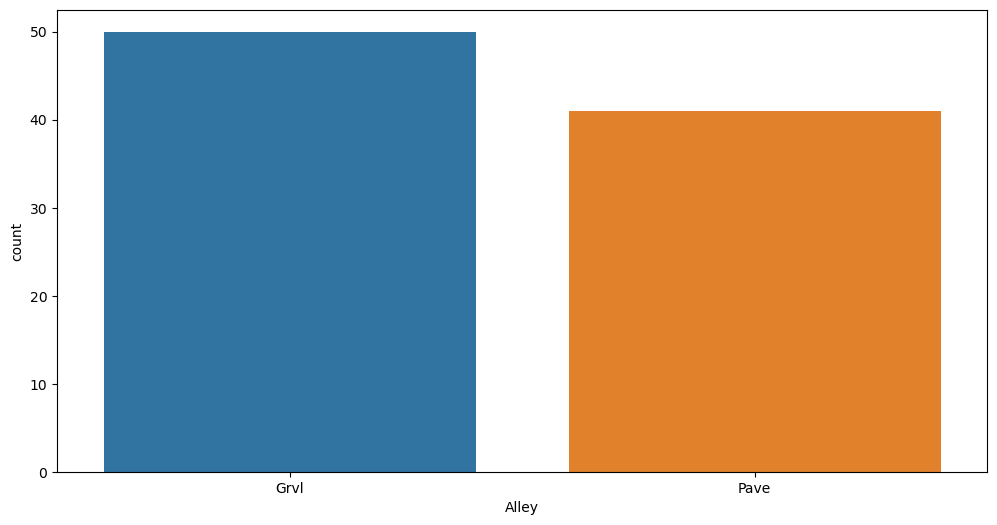

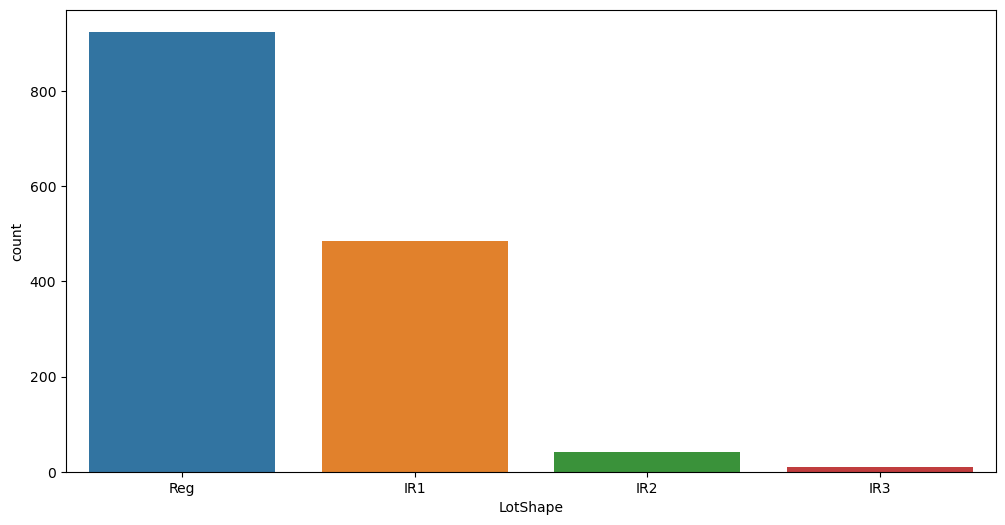

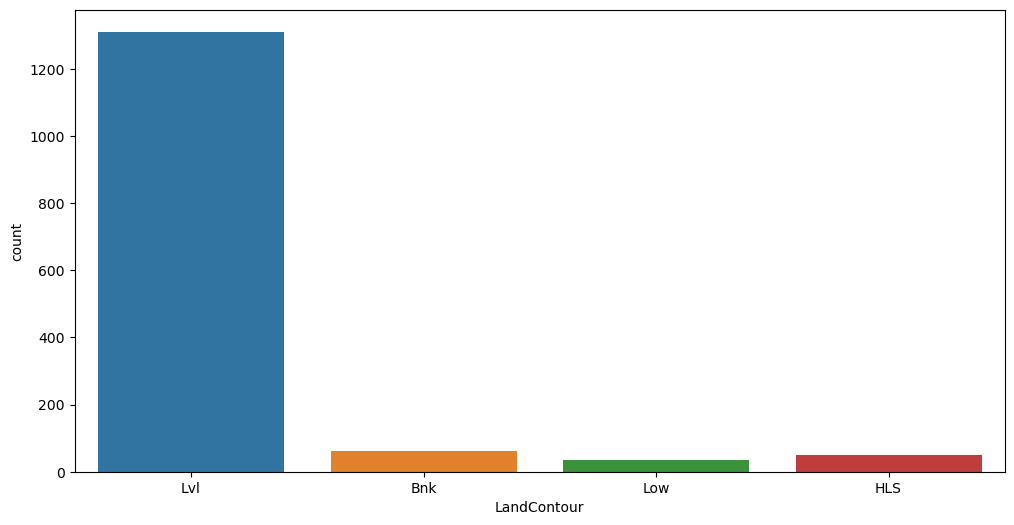

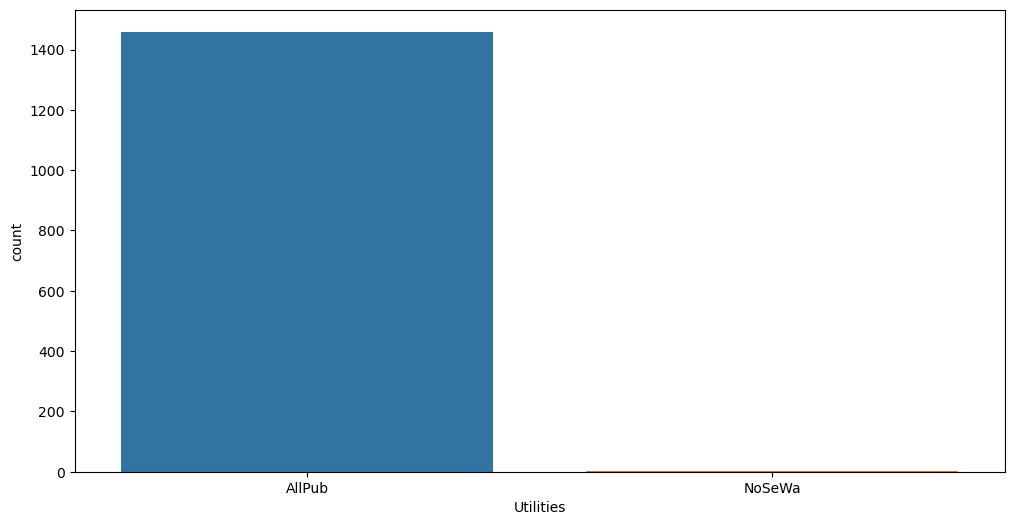

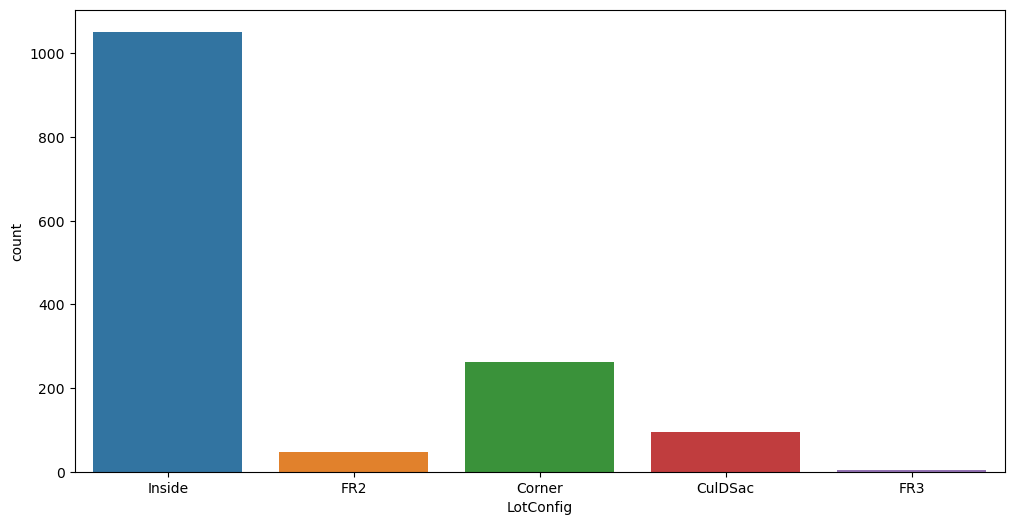

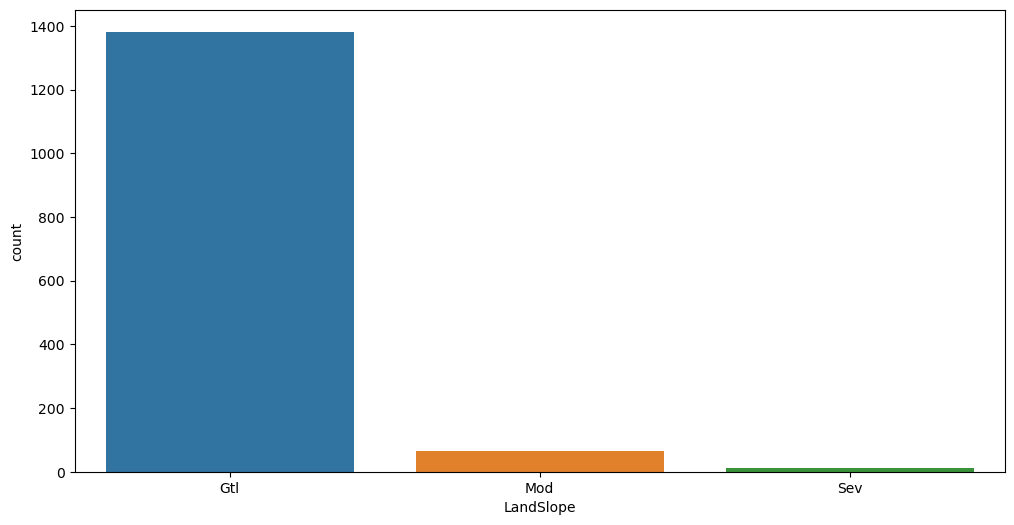

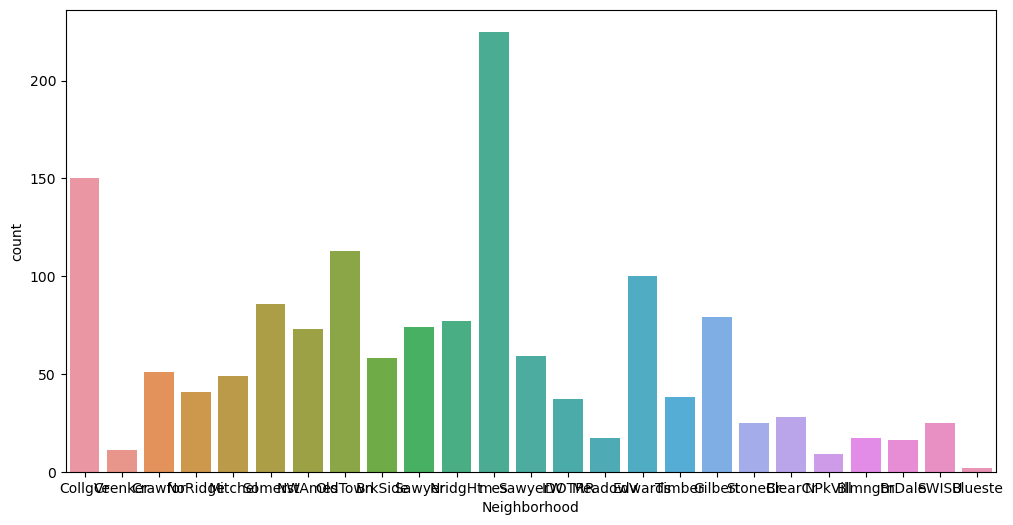

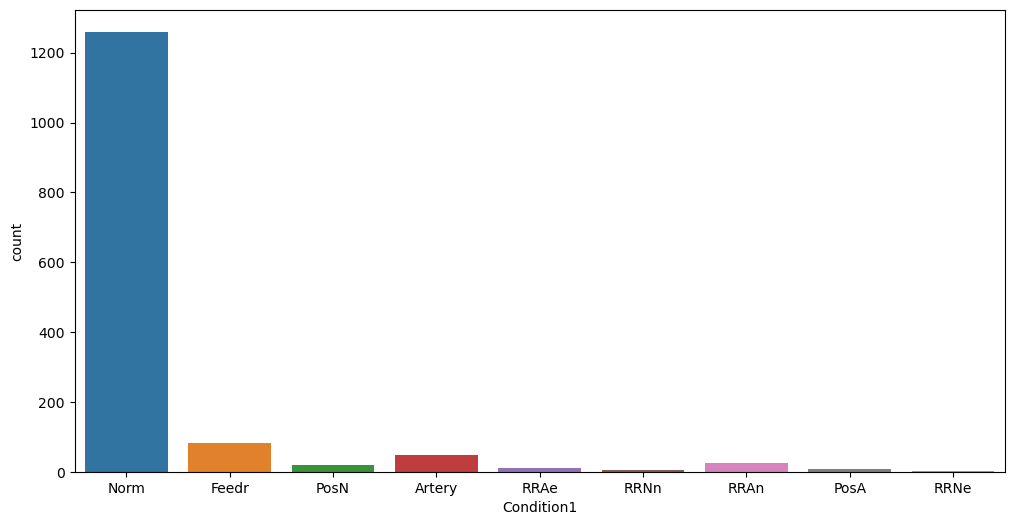

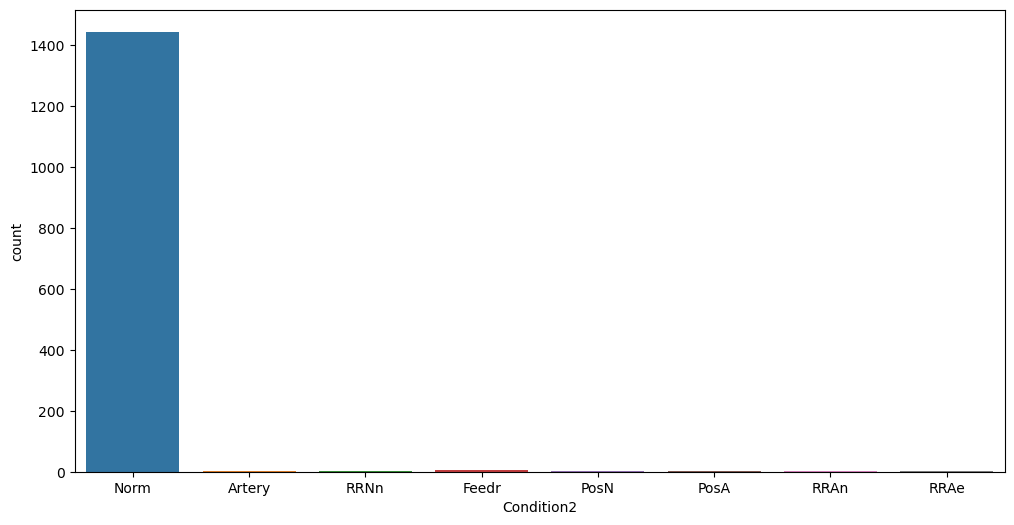

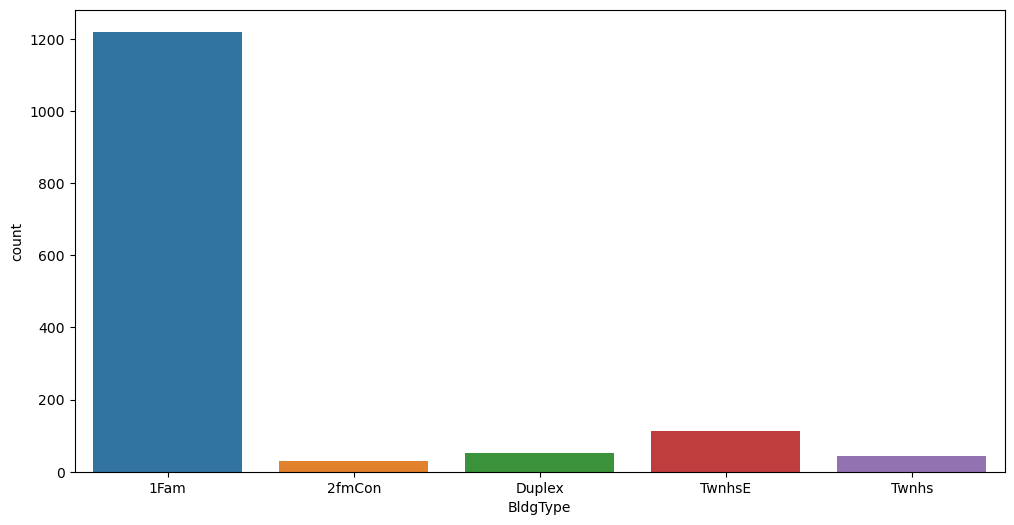

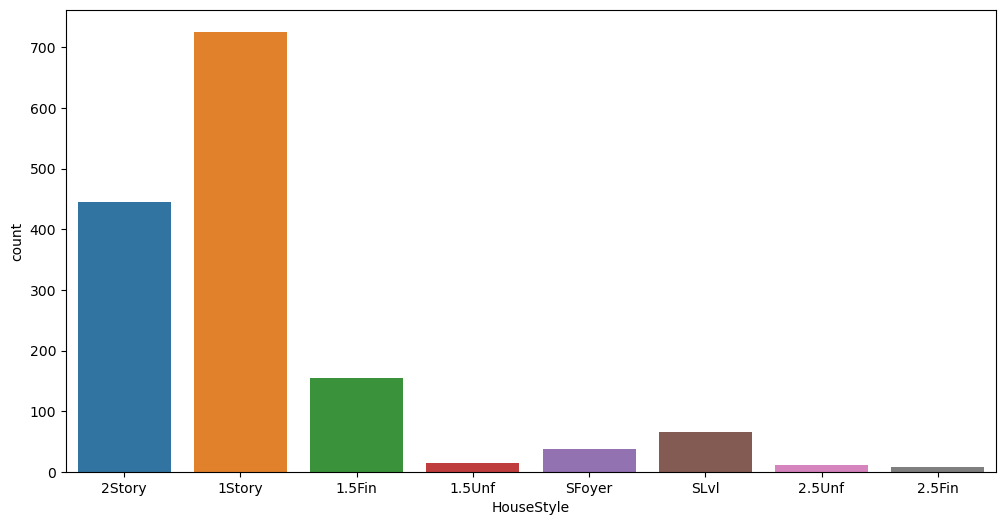

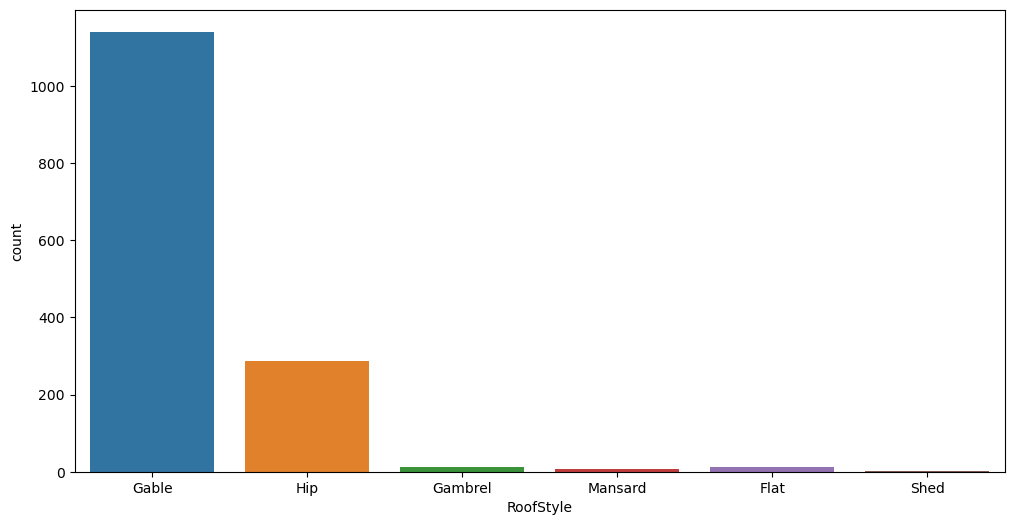

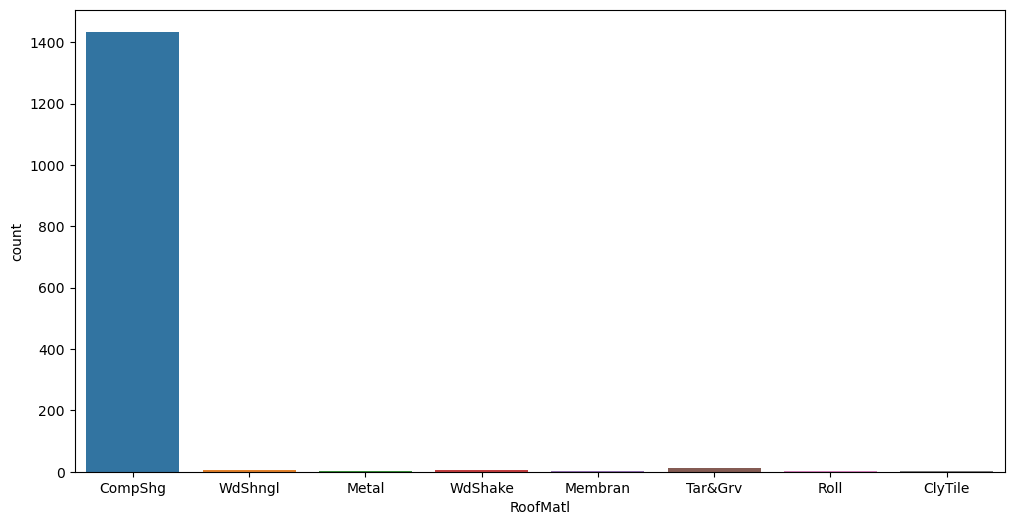

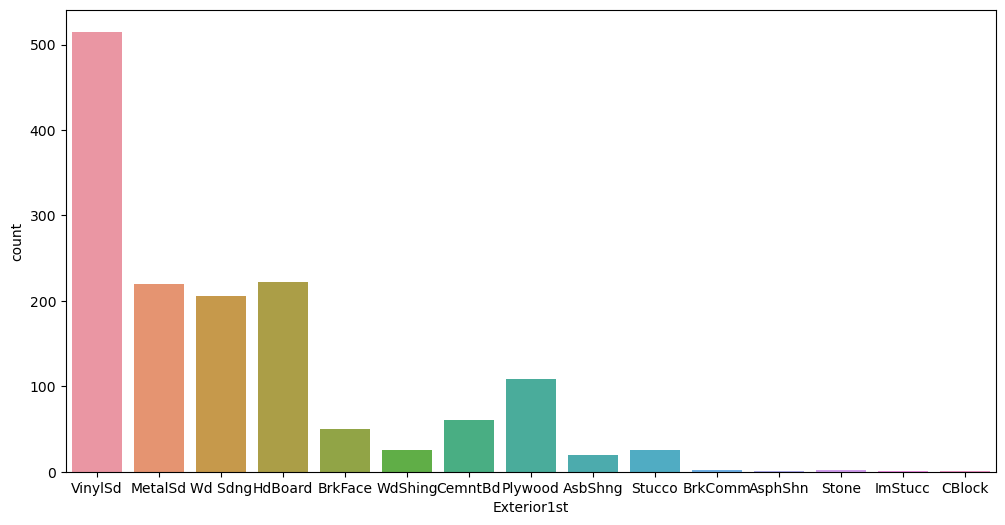

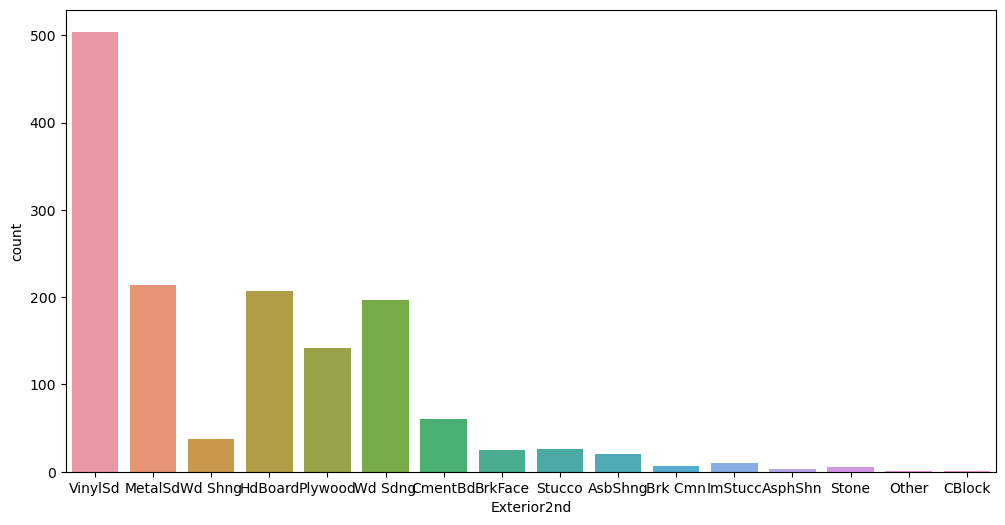

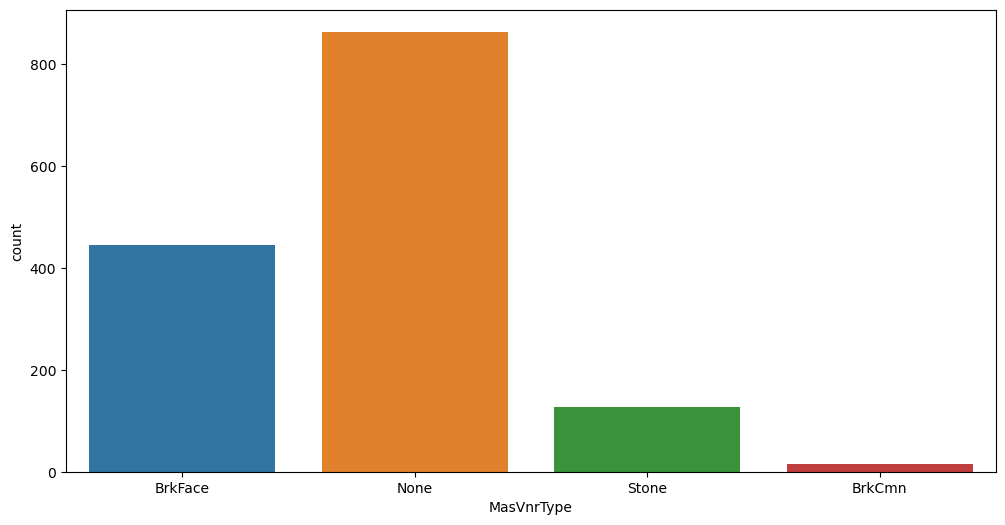

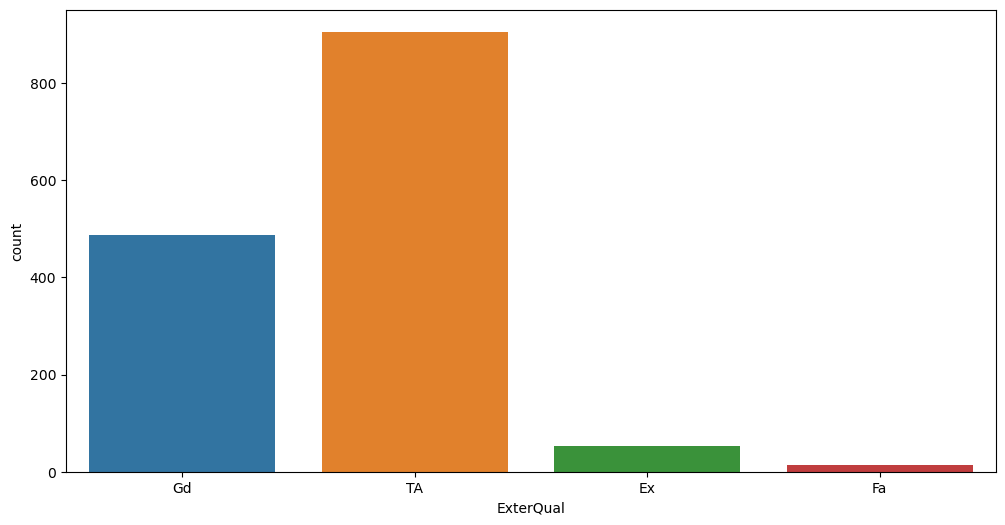

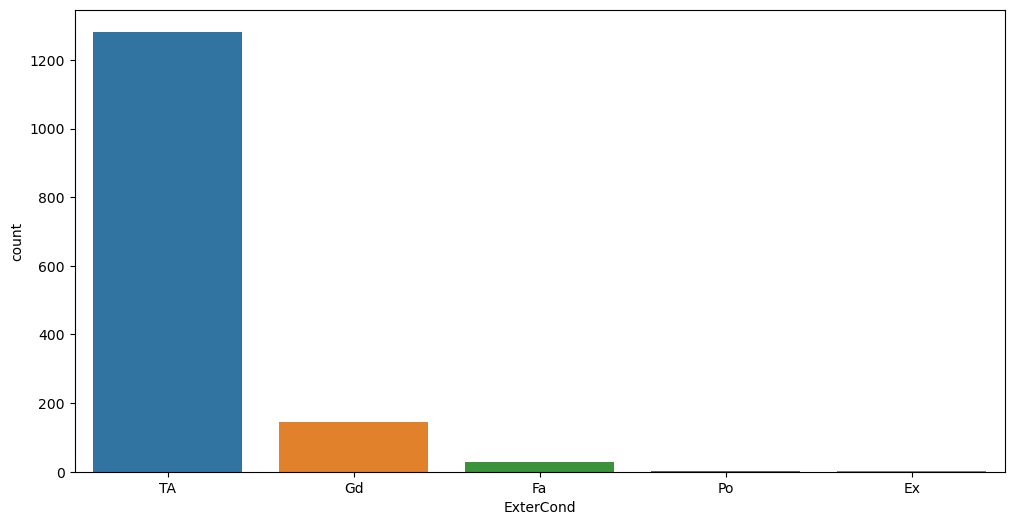

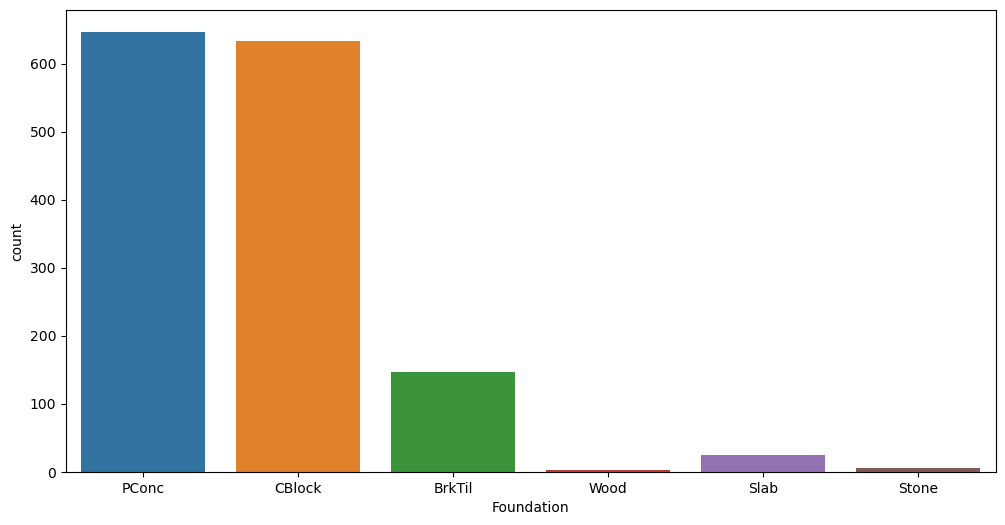

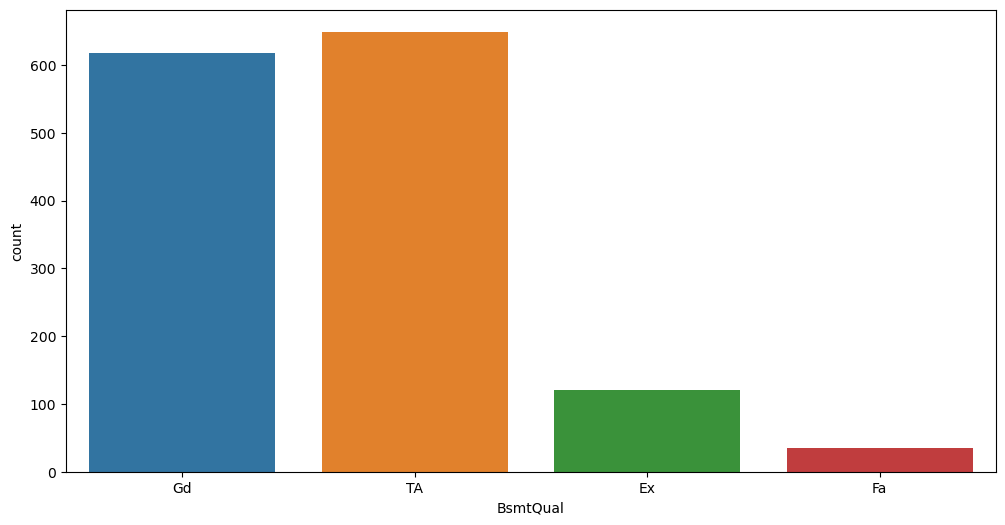

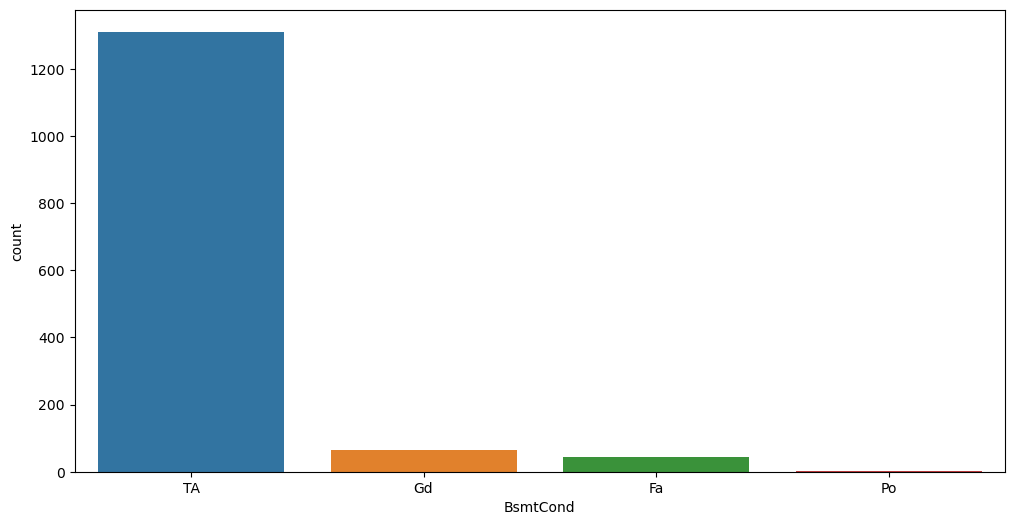

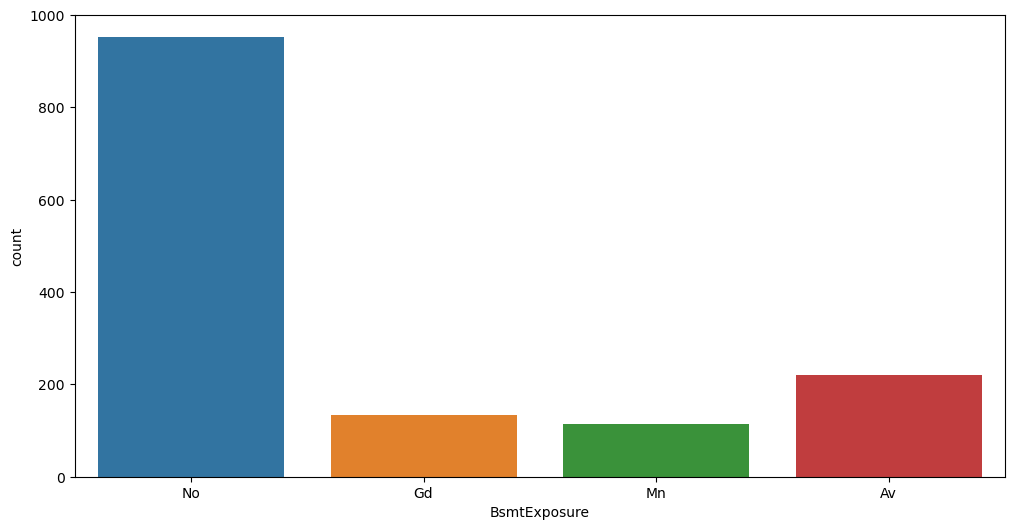

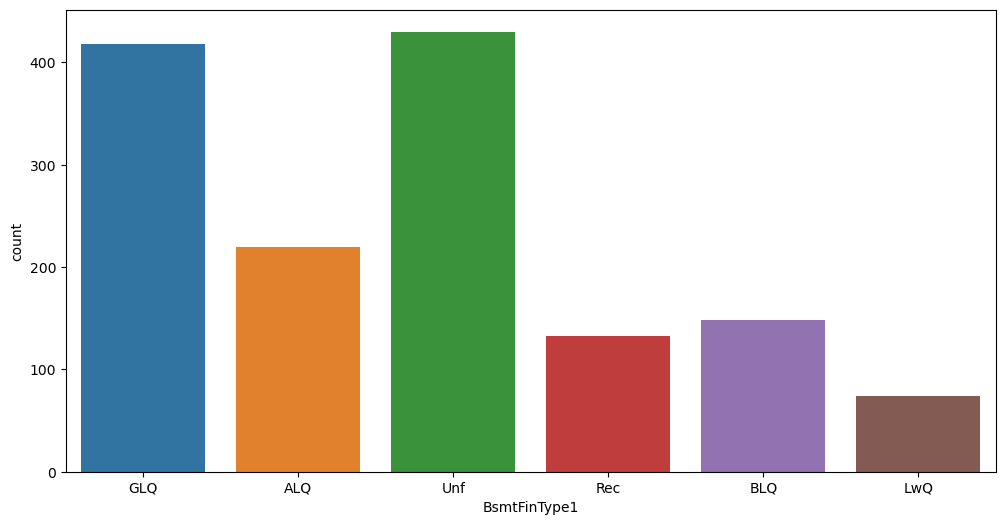

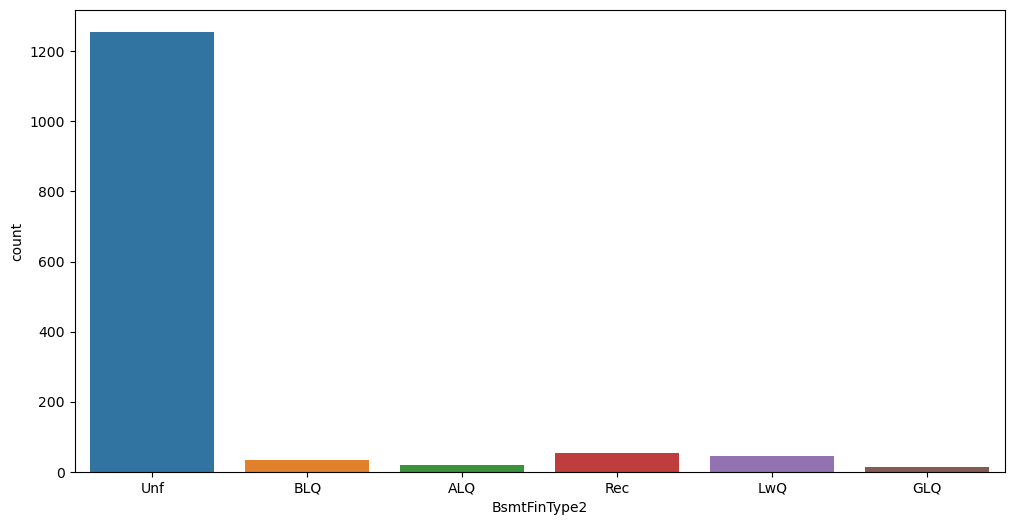

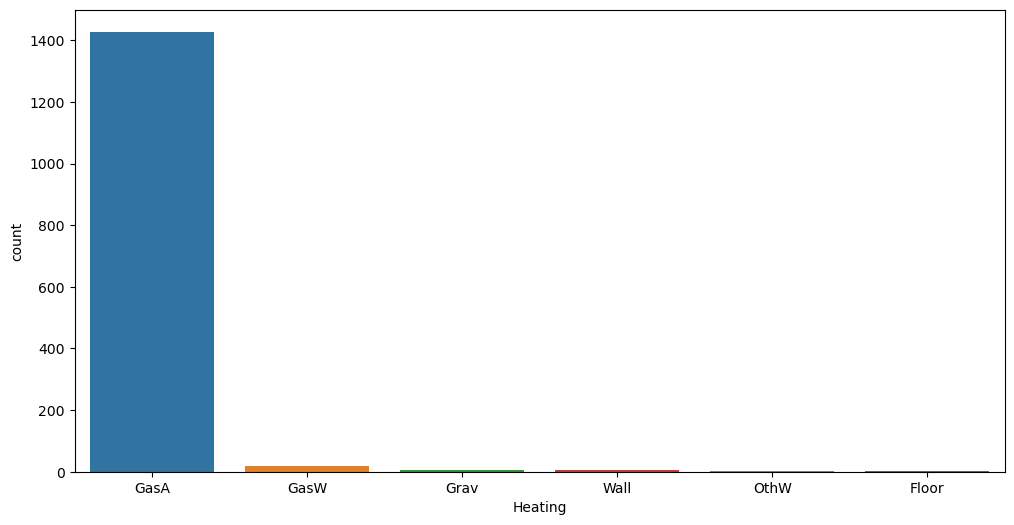

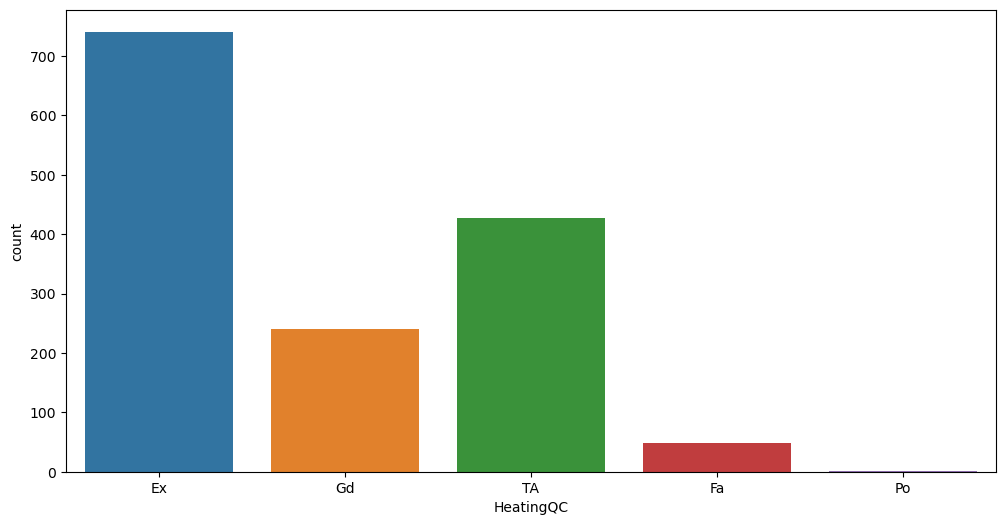

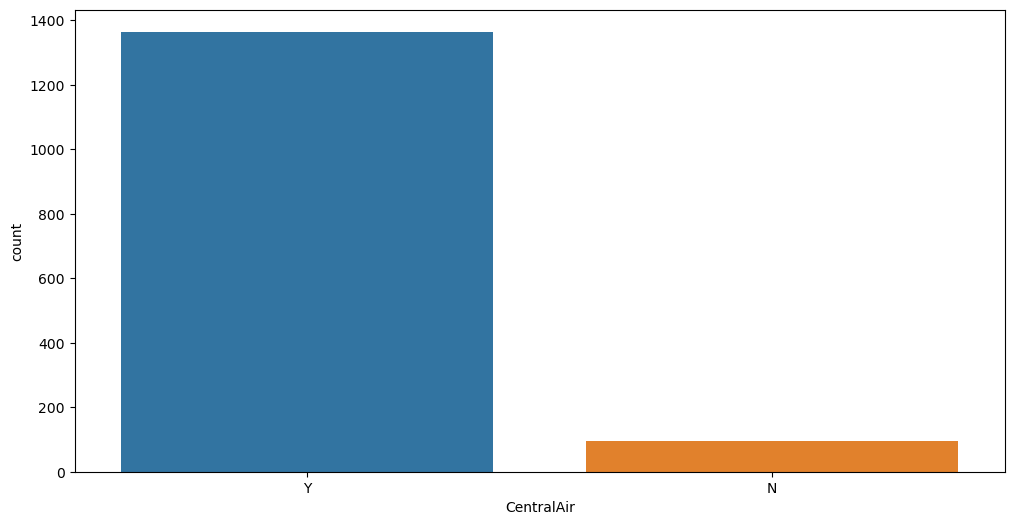

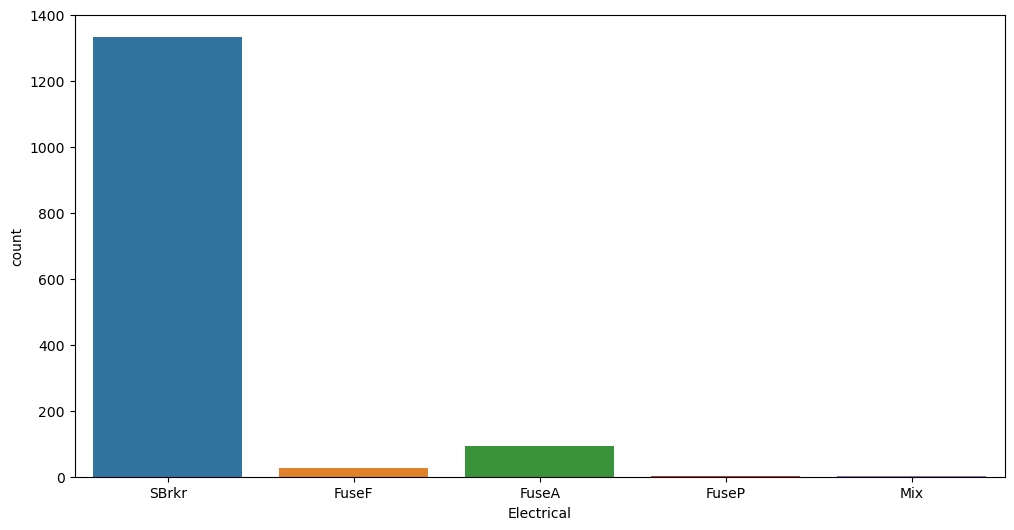

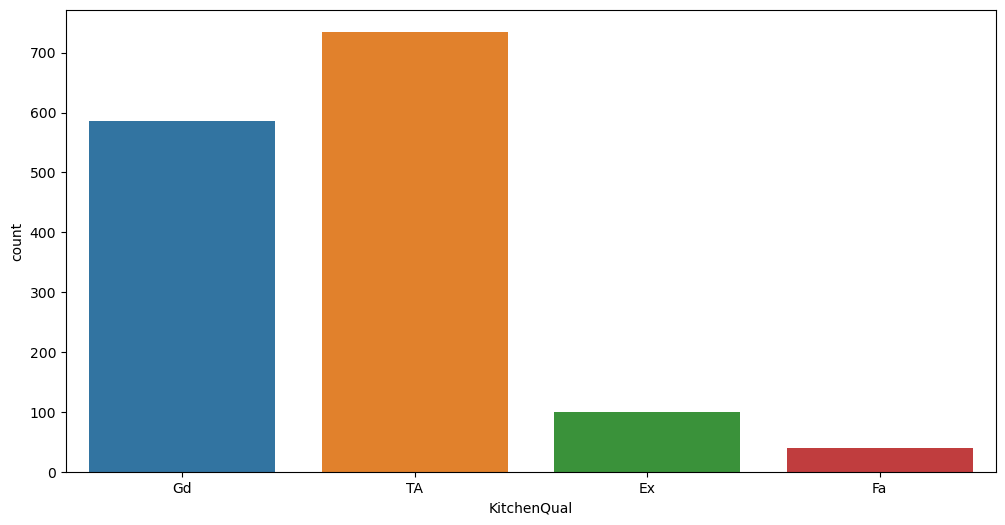

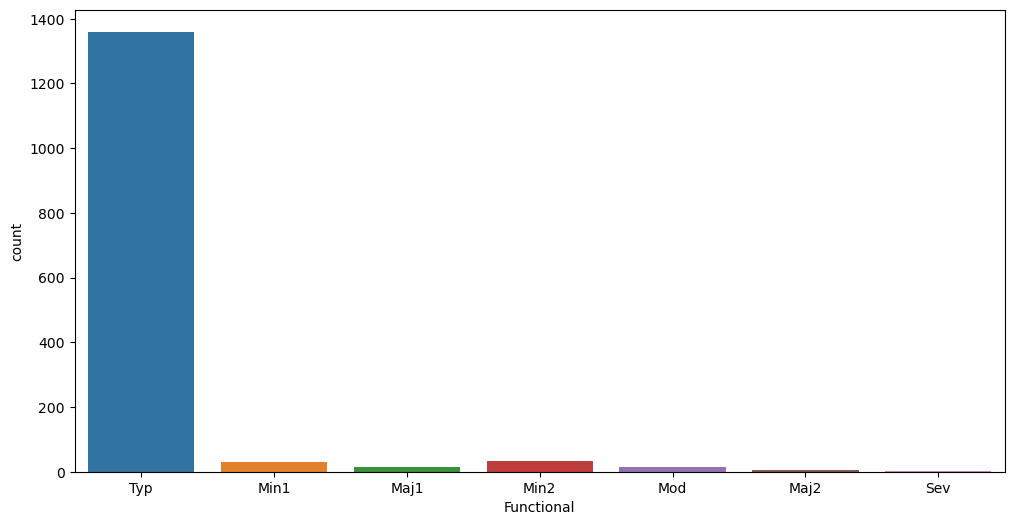

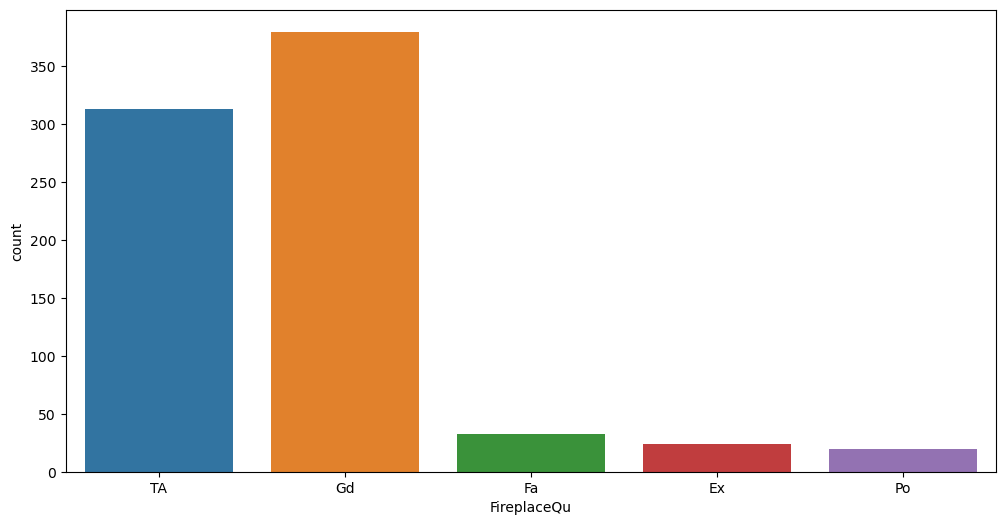

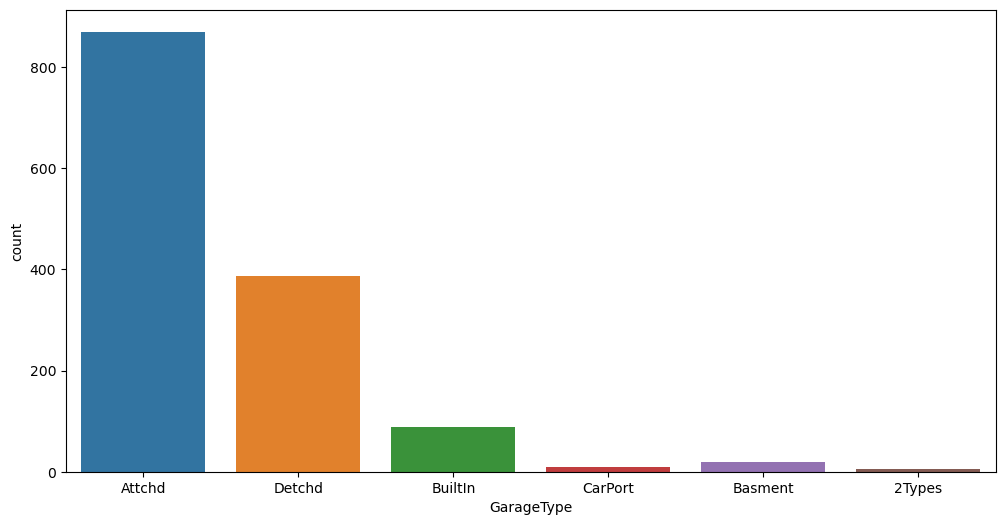

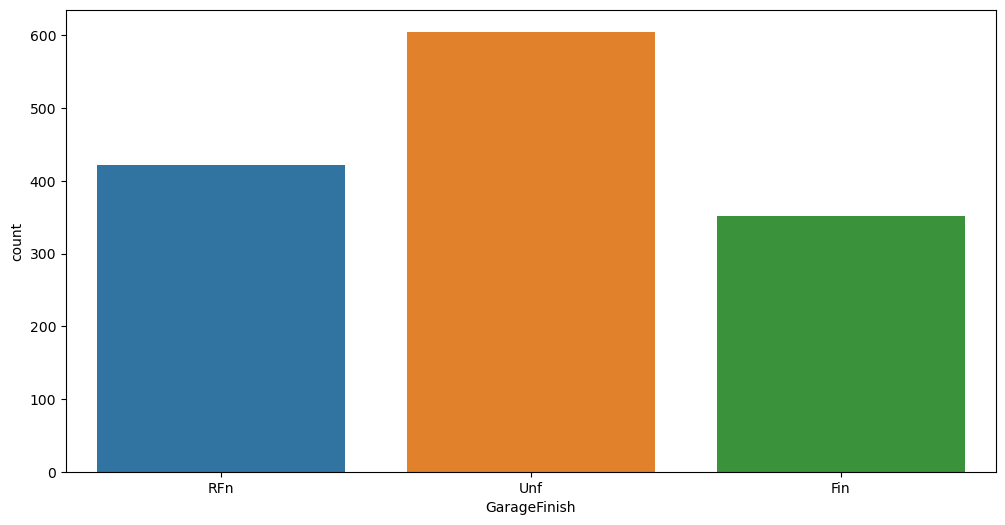

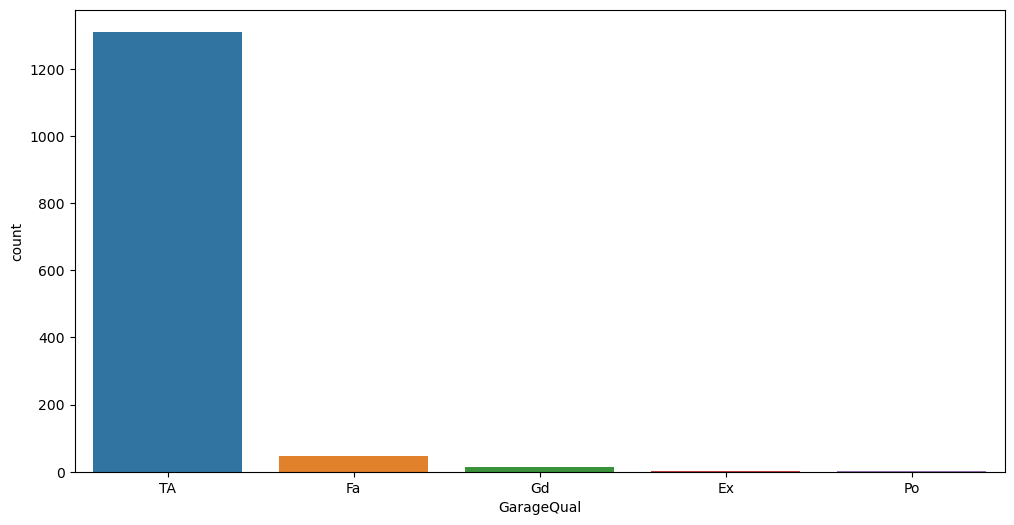

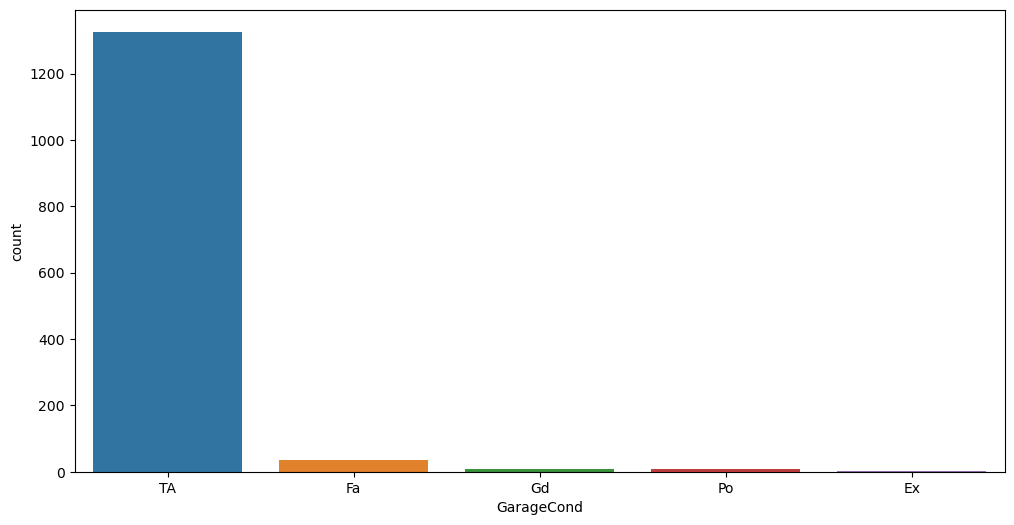

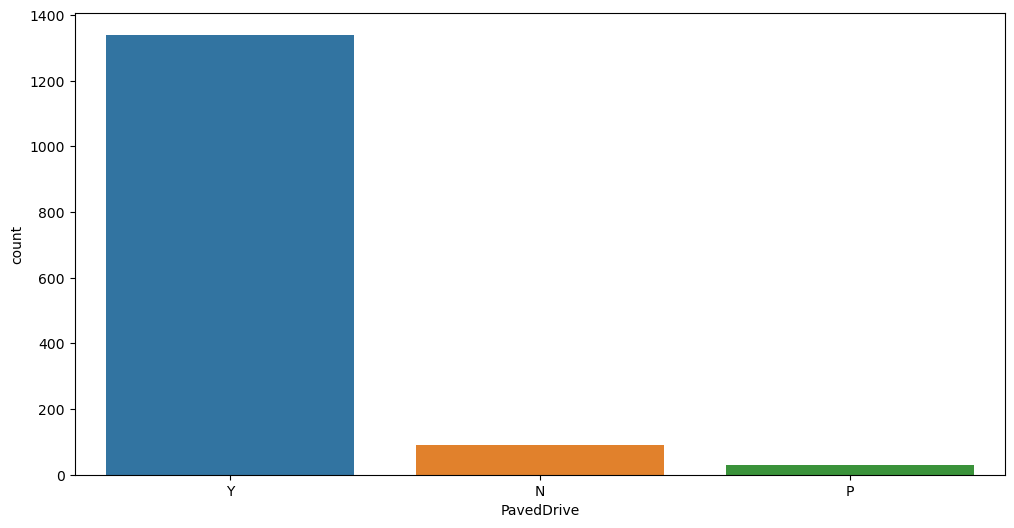

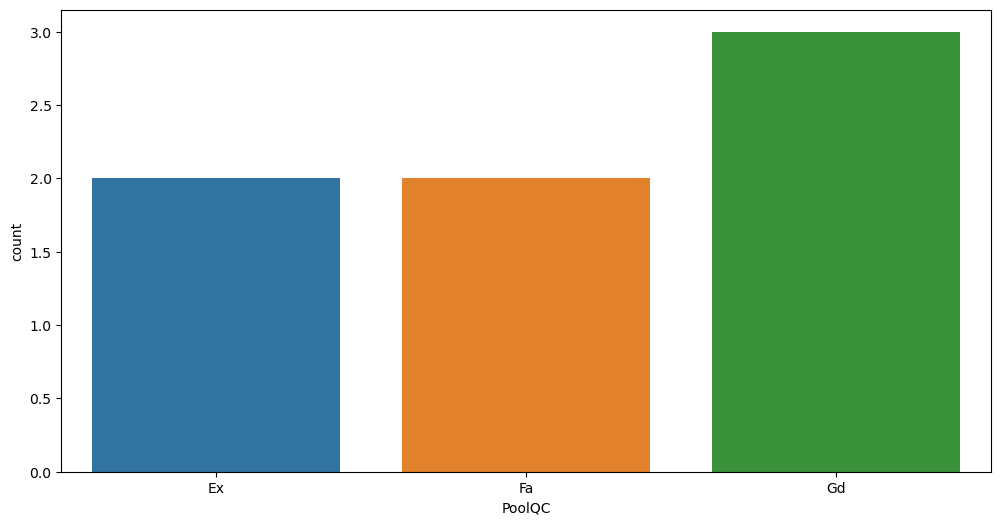

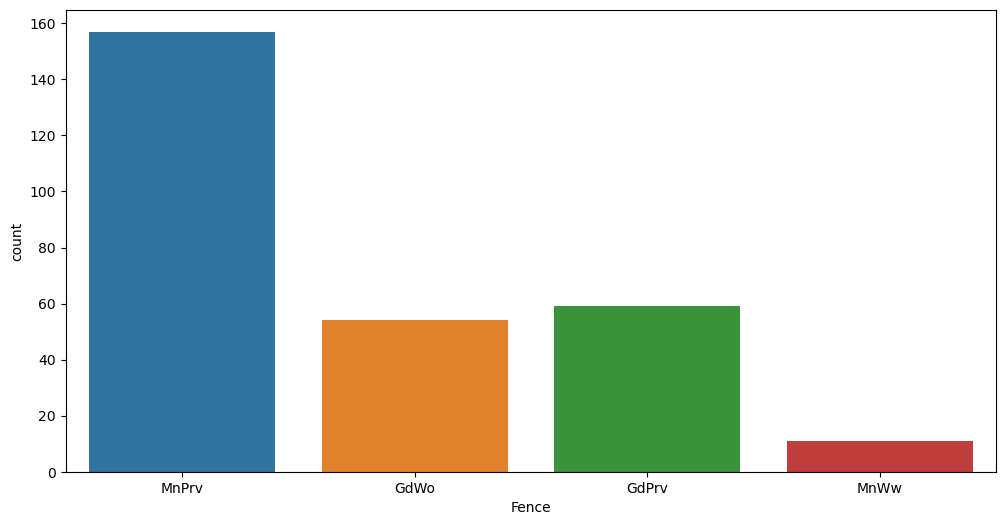

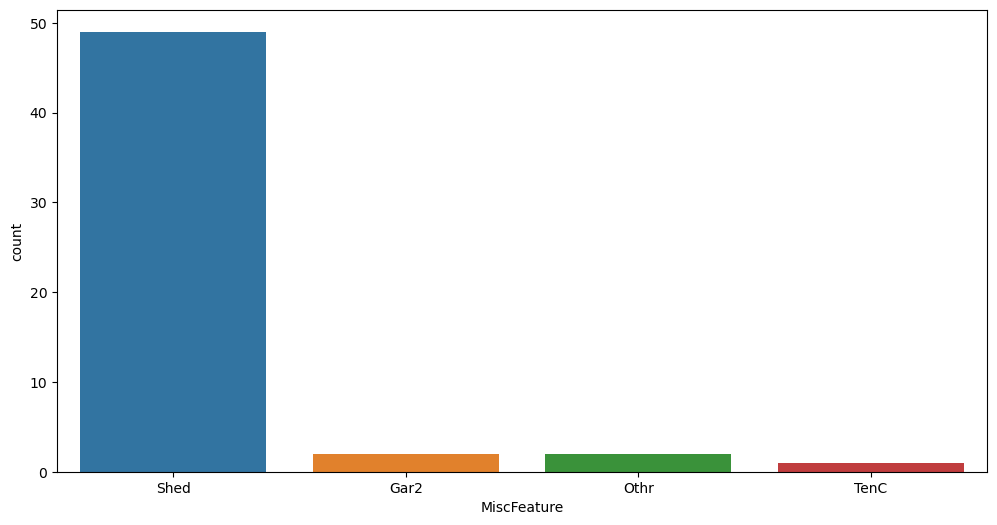

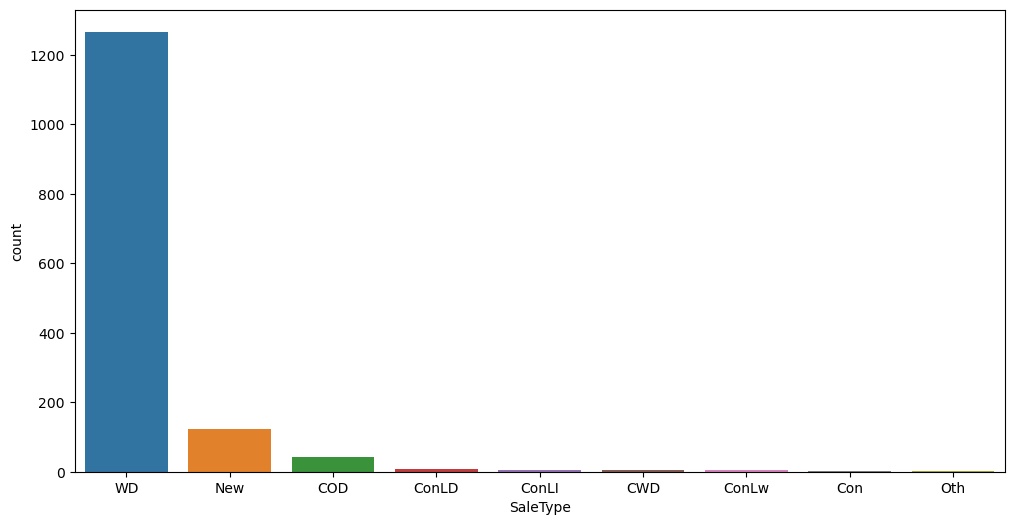

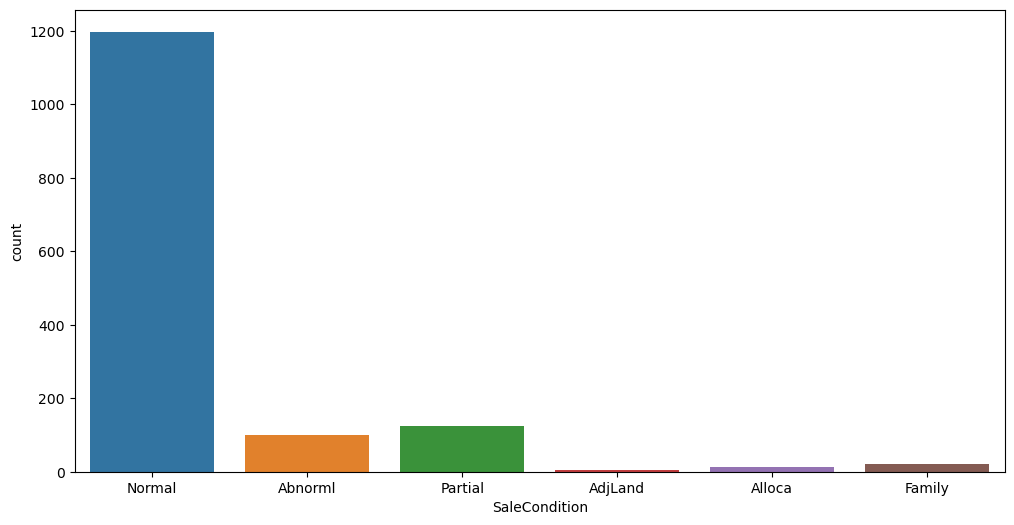

In [24]:
import seaborn as sns
for i in categorical_columns:
    plt.figure(figsize=(12,6)) 
    sns.countplot(i, data=housing) 
    

<AxesSubplot:xlabel='MSSubClass', ylabel='LotFrontage'>

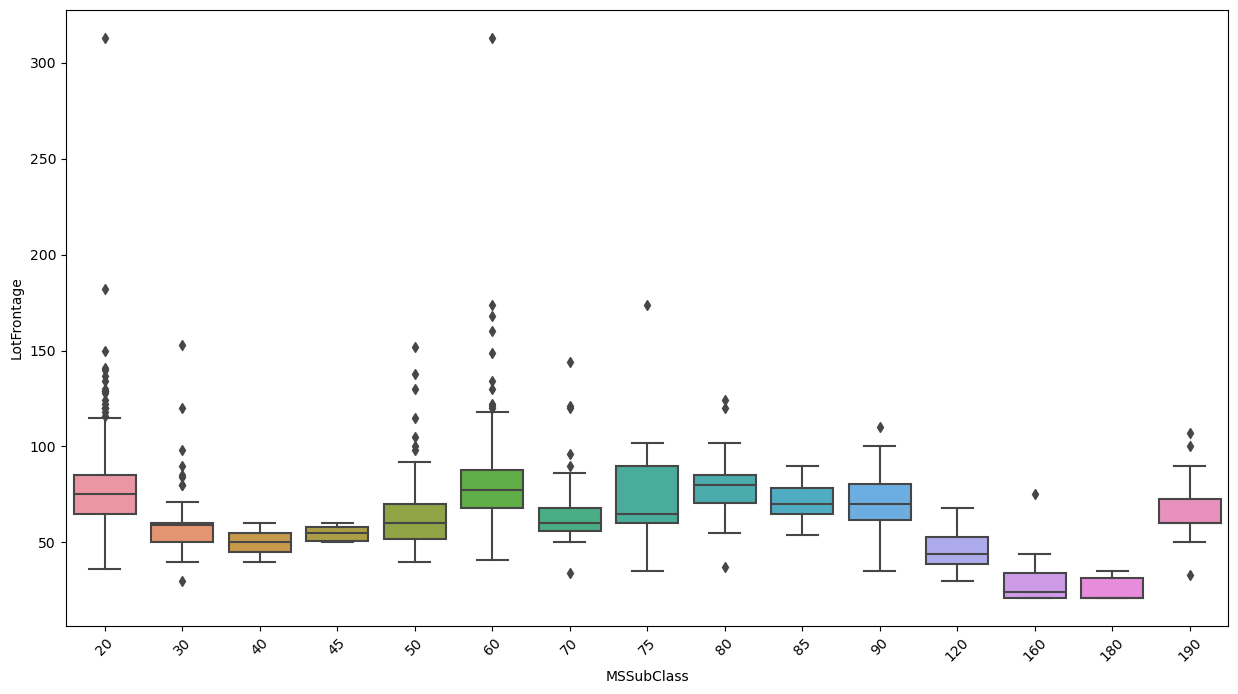

In [25]:
import seaborn as sns
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot("MSSubClass","LotFrontage", data=housing)

<AxesSubplot:xlabel='LotFrontage'>

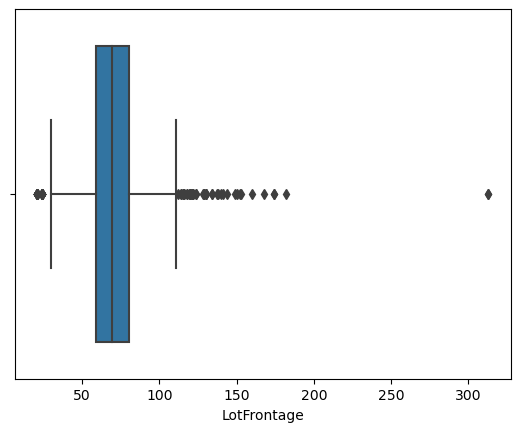

In [26]:
sns.boxplot(housing.LotFrontage)

# 5. Combine all the significant categorical and numerical variables

In [27]:
final_housing=pd.concat([num_housing,categorical_housing], axis=1)

In [28]:
final_housing.shape

(1460, 81)

In [29]:
final_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1453
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1121 non-null   float64
 1   MSSubClass     1121 non-null   float64
 2   LotFrontage    1121 non-null   float64
 3   LotArea        1121 non-null   float64
 4   OverallQual    1121 non-null   float64
 5   OverallCond    1121 non-null   float64
 6   YearBuilt      1121 non-null   float64
 7   YearRemodAdd   1121 non-null   float64
 8   MasVnrArea     1121 non-null   float64
 9   BsmtFinSF1     1121 non-null   float64
 10  BsmtFinSF2     1121 non-null   float64
 11  BsmtUnfSF      1121 non-null   float64
 12  TotalBsmtSF    1121 non-null   float64
 13  1stFlrSF       1121 non-null   float64
 14  2ndFlrSF       1121 non-null   float64
 15  LowQualFinSF   1121 non-null   float64
 16  GrLivArea      1121 non-null   float64
 17  BsmtFullBath   1121 non-null   float64
 18  BsmtHalf

# 6. Plot box plot for the new dataset to find the variables with outliers

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

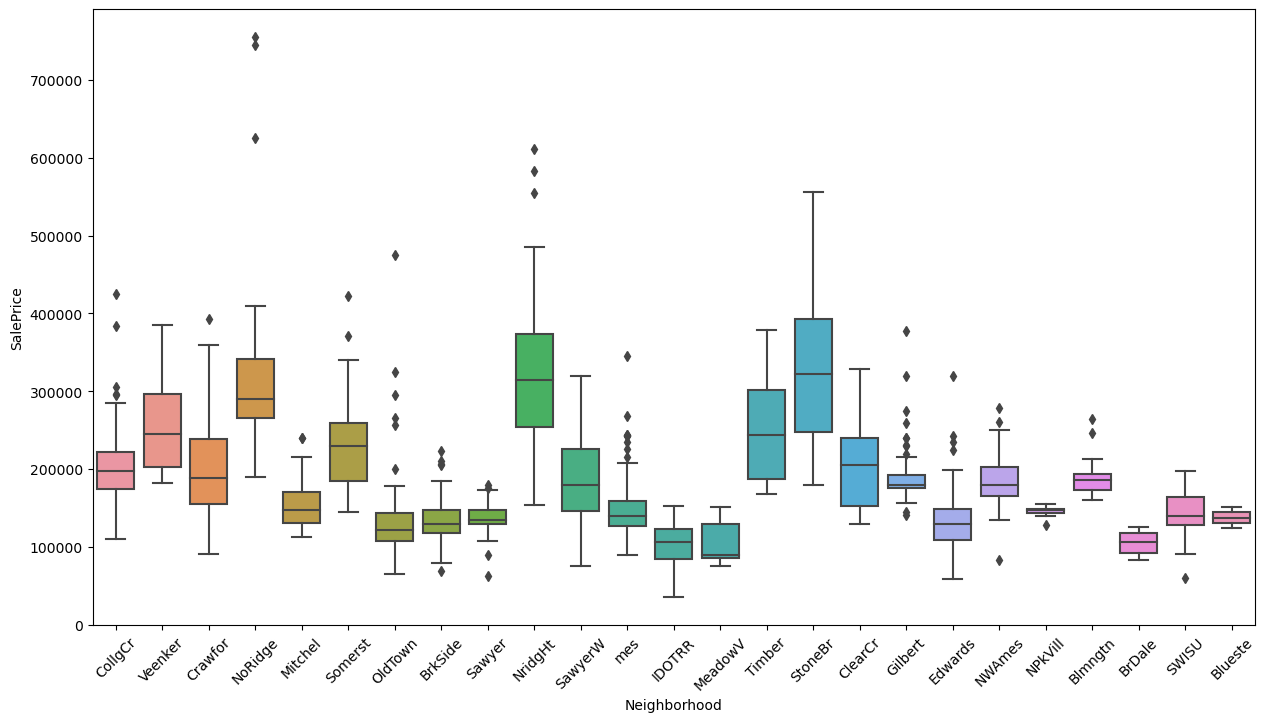

In [30]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('Neighborhood', 'SalePrice', data=final_housing)